In [2]:
import numpy as np
import pyross
from matplotlib import pyplot as plt 

In [3]:
# Get individual contact matrices
CH, CW, CS, CO = pyross.contactMatrix.UK()

# Generate class with contact matrix for SIR model with UK contact structure
generator = pyross.contactMatrix.ContactMatrixFunction(CH, CW, CS, CO)

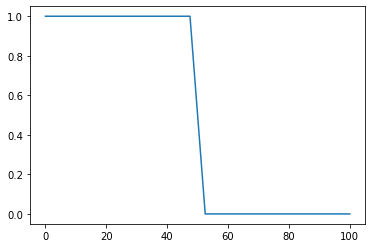

In [13]:
# Define a tanh protocol for aW, aS, aO 
def approx_tanh(t, width, loc):
    cond1 = (t < loc-width/2)
    cond2 = (t >= loc+width/2)
    cond3 = np.logical_and((t < loc+width/2), (t >= loc-width/2))
    cond_list = [cond1, cond2, cond3]
    fun_list = [-1, 1, lambda t: 2*(t-loc)/width]
    return np.piecewise(t, cond_list, fun_list)
    
def intervention_fun(t, M, width=1, loc=0, aW_f=0, aS_f=0, aO_f=0):
    aW = (1-approx_tanh(t, width, loc))/2*(1-aW_f) + aW_f
    aS = (1-approx_tanh(t, width, loc))/2*(1-aS_f) + aS_f
    aO = (1-approx_tanh(t, width, loc))/2*(1-aO_f) + aO_f
    aW_full = np.full((2, M), aW)
    aS_full = np.full((2, M), aS)
    aO_full = np.full((2, M), aO)
    return aW_full, aS_full, aO_full

width = 5
loc = 50 
time_points = np.linspace(0, 100, 1001)
aW = np.empty((1001,), dtype='float')
for (i, t) in enumerate(time_points): 
    aW[i] = intervention_fun(t, 16, width=width, loc=loc)[0][0, 0]
plt.plot(time_points, aW)
plt.show()

In [15]:
contactMatrix = generator.intervention_custom_temporal(intervention_fun, width=width, loc=loc)

In [16]:
# compare: initially, all contacts 
(CH + CW + CS + CO == contactMatrix(0)).all()

True

In [17]:
# compare: in the end, only home contacts 
(CH == contactMatrix(100)).all()

True